<a href="https://colab.research.google.com/github/SarahLares/Clustering_on_Survery/blob/master/Tarea_3_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrupación de Estudiantes Encuestados

In [0]:
import pandas as pd

## Importamos la Data
 

 Se utilizará la data  **Turkiye Student Evaluation Data Set**, perteneciente al repositorio  [**UCI**](https://archive.ics.uci.edu/ml/datasets/Turkiye+Student+Evaluation) de la Universidad de California.



In [0]:
url = 'https://raw.githubusercontent.com/SarahLares/Clustering_on_Survery/master/turkiye-student-evaluation_generic.csv'
df = pd.read_csv(url) 

In [3]:
df.shape

(5820, 33)

El set de datos posee 33 características las primeras 5 corresponden a el instructor, la materia, numero de veces que el estudiante ha repetido la materia, asistencia y la dificultad de la materia según los estudiantes. Las otras 28 columnas corresponden a las preguntas de la encuesta, que fue respondida por 5820 alumnos.

In [4]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## Visualicemos un poco los datos

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


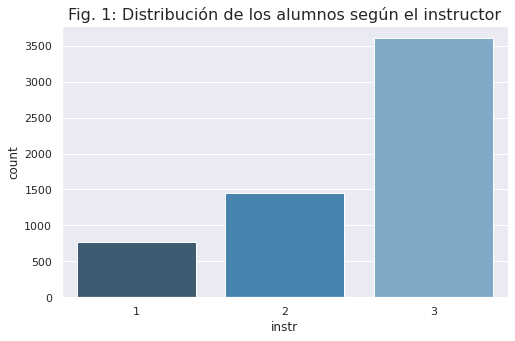

In [6]:
plt.figure(figsize=(8,5))
plt.title("Fig. 1: Distribución de los alumnos según el instructor",fontsize=16)
sns.countplot(x='instr', data=df, palette="Blues_d")
plt.show()

Podemos observar que el instructor **3** tuvo mas alumnos que respondieron la encuesta que los otros dos instructores.


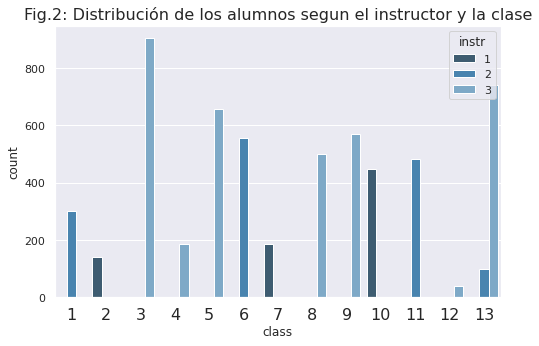

In [7]:
plt.figure(figsize=(8,5))
plt.title("Fig.2: Distribución de los alumnos segun el instructor y la clase",fontsize=16)
sns.countplot(x='class', data=df,hue='instr', palette="Blues_d")
plt.tick_params(axis='x', labelsize=16)
plt.show()

Podemos observar claramente, que hay una desigualdad en la cantidad de alumnos que realizaron la encuesta en cada clase. 

 Por otra parte, podemos observar que el instructor 3 tuvo más alumnos debido a que imparte más clases con más alumnos que los otros dos instructores.
 

### Sobre las preguntas en la encuesta

Q1: El contenido del curso semestral, el método de enseñanza y el sistema de evaluación se proporcionaron al principio.

Q2: Las metas y objetivos del curso se establecieron claramente al comienzo del período.

Q3: El curso valió la cantidad de crédito asignado.

Q4: El curso se impartió de acuerdo con el plan de estudios anunciado el primer día de clase.

Q5: Las discusiones en clase, tareas, solicitudes y estudios fueron 
satisfactorios.

Q6: El libro de texto y otros recursos de los cursos fueron suficientes y actualizados.

Q7: El curso permitió trabajo de campo, aplicaciones, laboratorio, discusión y otros estudios.

Q8: Los cuestionarios, tareas, proyectos y exámenes contribuyeron a ayudar al aprendizaje.

Q9: Disfruté mucho la clase y estaba ansioso por participar activamente durante las conferencias.

Q10: Mis expectativas iniciales sobre el curso se cumplieron al final del período o año.

Q11: El curso fue relevante y beneficioso para mi desarrollo profesional.

Q12: El curso me ayudó a mirar la vida y el mundo con una nueva perspectiva.

Q13: El conocimiento del Instructor era relevante y actualizado.

Q14: El instructor vino preparado para las clases.

Q15: El instructor enseñó de acuerdo con el plan de lección anunciado.

Q16: El instructor estaba comprometido con el curso y era comprensible.

Q17: El instructor llegó a tiempo para las clases.

Q18: El Instructor tiene una entrega / discurso suave y fácil de seguir.

Q19: El instructor hizo un uso efectivo de las horas de clase.

Q20: El instructor explicó el curso y estaba ansioso por ayudar a los estudiantes.

Q21: El instructor demostró un enfoque positivo para los estudiantes.

Q22: El instructor fue abierto y respetuoso con las opiniones de los estudiantes sobre el curso.

Q23: El instructor alentó la participación en el curso.

Q24: El instructor asignó tareas / proyectos relevantes y ayudó / guió a los estudiantes.

Q25: El instructor respondió a las preguntas sobre el curso dentro y fuera del curso.

Q26: El sistema de evaluación del Instructor (preguntas intermedias y finales, proyectos, tareas, etc.) midió efectivamente los objetivos del curso.

Q27: El instructor brindó soluciones a los exámenes y los discutió con los estudiantes.

Q28: El Instructor trató a todos los estudiantes de manera correcta y objetiva.

In [0]:
X_Q = df.iloc [:, 5:33] 
Q_means = X_Q.mean(axis = 0) 
Q_means = Q_means.to_frame('mean')
Q_means.reset_index(level=0, inplace=True)

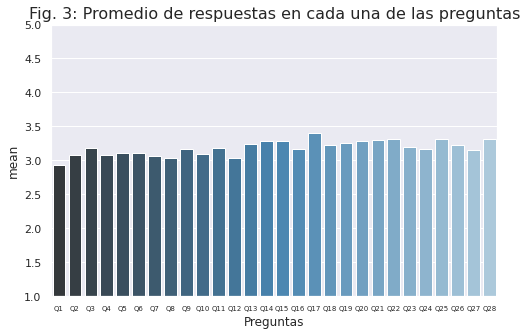

In [9]:
plt.figure(figsize=(8,5))
plt.title("Fig. 3: Promedio de respuestas en cada una de las preguntas",fontsize=16)
sns.barplot(x='index', y = 'mean', data = Q_means, palette="Blues_d")
plt.tick_params(axis='x', labelsize=7)
plt.xlabel('Preguntas')
plt.ylim(1,5)
plt.show()

Podemos observar que la media de cada pregunda está cercana a **3**

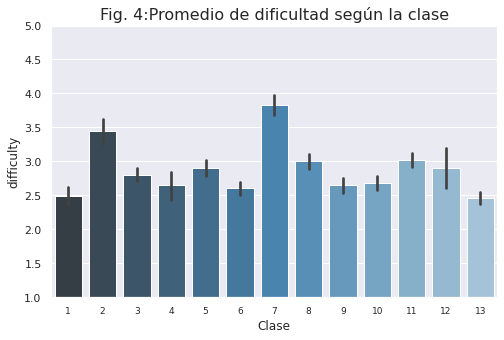

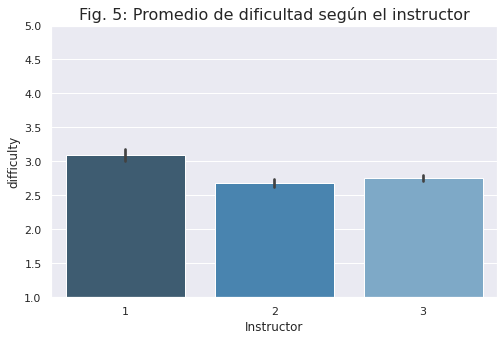

In [10]:
plt.figure(figsize=(8,5))
plt.title("Fig. 4:Promedio de dificultad según la clase",fontsize=16)

plt.ylim(1,5)
plt.tick_params(axis='x', labelsize=9)
sns.barplot(x='class', y = 'difficulty', data = df, palette="Blues_d")
plt.xlabel('Clase')
plt.show()


plt.figure(figsize=(8,5))
plt.title("Fig. 5: Promedio de dificultad según el instructor",fontsize=16)

plt.ylim(1,5)
sns.barplot(x='instr', y = 'difficulty', data = df, palette="Blues_d")
plt.xlabel('Instructor')
plt.show()

Podemos observar  en la figura 4 que las clases que fueron puntuadas con la mayor dificultad son la 2 y la 7, ambas impartidas por el instructos 1. Sin embargo, en ambas clases menos de 200 alumnos respondieron la encuesta, que es un número bajo comparado con clases como la 13 o la 3. Por lo cual, el instructor uno obtiene un promedio de dificultad mayor a los otros dos instructores (ver figura 5).

##Selección de los Datos

Sabemos que las respuestas a las preguntas de la encuesta se encuentran de la columna 5 a la 33 y que estas están escaladas con valores discretos del 1 al 5. 
Serán estudiadas las respuestas a las encuestas de dos cursos.

*   clase 7, instructor 1, 187 alumnos respondieron la encuesta, promedio de dificultad de la clase según los alumnos 3.75

*   clase 11, instructor 2, 484 alumnos respondieron la encuesta, promedio de dificultad de la clase según los alumnos 3





In [0]:
df_C7 = df.loc[df['class']==7].iloc[:,5:].reset_index(drop=True)
df_C8 = df.loc[df['class']==8].iloc[:,5:].reset_index(drop=True)
df_C11 = df.loc[df['class']==11].iloc[:,5:].reset_index(drop=True)

### Correlación entre las preguntas de la encuesta

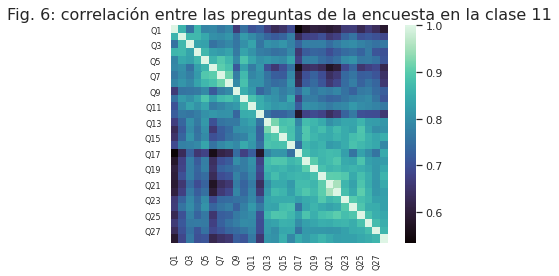

In [12]:
cor11 = df_C11.corr() 
sns.heatmap(cor11, square = True,cmap='mako')
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.title('Fig. 6: correlación entre las preguntas de la encuesta en la clase 11',fontsize=16)
plt.show()

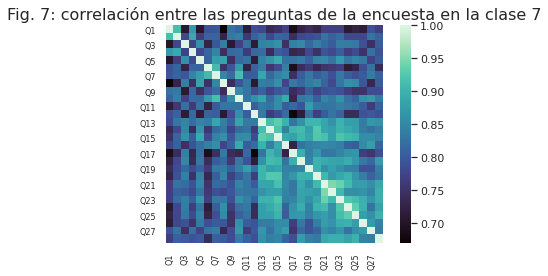

In [13]:
cor = df_C7.corr() 
plt.title('Fig. 7: correlación entre las preguntas de la encuesta en la clase 7',fontsize=16)
sns.heatmap(cor, square = True,cmap='mako')
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.show()

Para intentar conocer un poco más sobre la relación entre alguna de las preguntas de la encuesta se estudió la correlación entre las preguntas de la encuesta para la clase 7 y la 11.


Primero se calculó la matriz de correlación entre las variables y se graficó lo obtenido como un mapa de calor.

En la figura 6, podemos notar correlaciones entre las primeras 9 preguntas, sin embargo, esto no se observa tan claramente en la figura7.

Por otra parte, podemos observar en las gráficas 6 y 7 que existe una fuerte correlación entre las últimas 15 preguntas de la encuesta. En la lista de preguntas, podemos observar que estas están relacionadas unicamente con la calidad de enseñanza del instructor.



## K Means 

Se ralizará la descripción de los tres cursos seleccionados mediante la implementación de la técnica K Means. 



In [0]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_7 = ss.fit_transform(df_C7)
X_11 = ss.fit_transform(df_C11)

### Selección del numero de vecinos

Para la selección del número de vecinos se utilizó el método de la silueta.

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [0]:
sil_11 = []
sil_7 = []

for i in range(2,10):

  model_11 = KMeans(n_clusters= i, random_state=2)
  model_11.fit(X_11)
  sil_11.append(silhouette_score(X_11, model_11.fit_predict(X_11)))

  model_7 = KMeans(n_clusters= i, random_state=3)
  model_7.fit(X_7)
  sil_7.append(silhouette_score(X_7, model_7.fit_predict(X_7)))

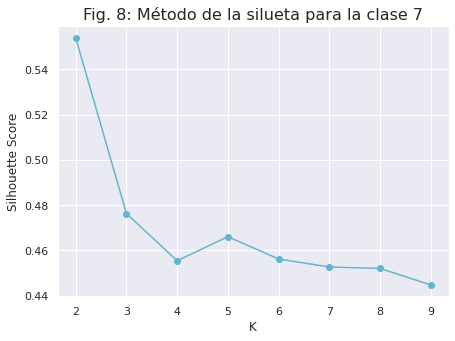

In [17]:
plt.figure(figsize=(7,5))
plt.plot(np.linspace(2,9,8),sil_7,'co-')
plt.xlabel ('K') 
plt.ylabel ('Silhouette Score')
plt.title('Fig. 8: Método de la silueta para la clase 7',fontsize=16) 
plt.show()

En la figura 8 podemos observar que según el método de la silueta la clase 7 puede agruparse en dos clusters.

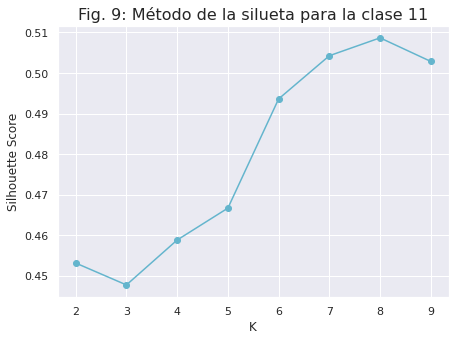

In [275]:
plt.figure(figsize=(7,5))
plt.plot(np.linspace(2,9,8),sil_11,'co-')
plt.xlabel ('K') 
plt.ylabel ('Silhouette Score')
plt.title('Fig. 9: Método de la silueta para la clase 11',fontsize=16) 
plt.show()

Por último, para la clase 11 (fig 9) para caracterizar la clase serán necesarios 8 clusters.



##Clustering

Se realizan los modelos y los ajusted para el numero de vecinos indicado en cada materia


In [0]:
model_C7 = KMeans(n_clusters=2, random_state = 4).fit(X_7)
model_C11 = KMeans(n_clusters=8,random_state=1).fit(X_11)

Como podemos observar se tienen 28 características, lo cual dificultará la visualización de los clusters, por lo cual reduciremos la dimencionalidad utilizando el análisis de componentes principales ( PCA ). 

In [0]:
from sklearn.decomposition import PCA

In [0]:
labels_7 = model_C7.labels_
labels_11 = model_C11.labels_

In [0]:
pca_11 = PCA(n_components=2 , random_state = 1)
pca_7 = PCA(n_components=2 , random_state = 1)

X7_PCA = pca_7.fit_transform(X_7)
X11_PCA = pca_11.fit_transform(X_11)

### Clase 7

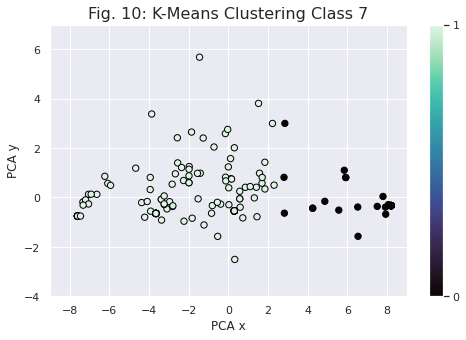

In [232]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(X7_PCA[:,0],X7_PCA[:,1],
                     c= labels_7,cmap='mako',s=40,edgecolors = 'black')
ax.set_title('Fig. 10: K-Means Clustering Class 7',fontsize=16)
ax.set_xlabel('PCA x')
ax.set_ylabel('PCA y')
ax.set_ylim(-4,7)
ax.set_xlim(-9,9)
plt.colorbar(scatter,ticks= [0,1],spacing='uniform')

plt.show()

Gráficamente podemos observar que hay menos alumnos pertenecientes al grupo 0, contemos el numero de estudiantes en cada grupo.

In [196]:
C7 = pd.concat([df.loc[df['class']==7].iloc[:,2:].reset_index(drop=True),pd.DataFrame(labels_7,columns=['cluster'])],axis=1)
C7.shape

(187, 32)

In [234]:
C7['cluster'].value_counts(sort=False,normalize = True)

0    0.235294
1    0.764706
Name: cluster, dtype: float64

Podemos observar que el 24% de los alumnos de la clase 7 pertenecen al cluster 0, mientras que 76% pertenecen al cluster 1.

In [0]:
XC7 = C7.loc[C7['cluster']==0].iloc [:, 3:31] 
C70_means = XC7.mean(axis = 0) 
C70_means = C70_means.to_frame('cluster=0')
C70_means.reset_index(level=0, inplace=True)
XC71 = C7.loc[C7['cluster']==1].iloc [:, 3:31] 
C71_means = XC71.mean(axis = 0) 
C71_means = C71_means.to_frame('cluster=1')
C7_means= pd.concat([C70_means,C71_means.reset_index(drop=True)],axis=1)

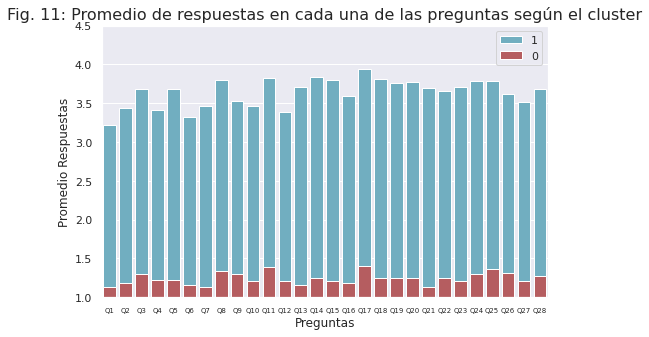

In [273]:
plt.figure(figsize=(8,5))
plt.title("Fig. 11: Promedio de respuestas en cada una de las preguntas según el cluster",fontsize=16)
sns.barplot(x='index', y = 'cluster=1', data = C7_means, color='c',label='1')
sns.barplot(x='index', y = 'cluster=0', data = C7_means, color='r',label='0')
plt.tick_params(axis='x', labelsize=7)
plt.ylabel('Promedio Respuestas')
plt.xlabel('Preguntas')
plt.legend()
plt.ylim(1,4.5)
plt.show()

Podemos observar que los estudiantes pertenecientes al cluster 0 , en promedio respondieron de forma negativa a la encuesta, es decir no estuvieron conformes con el curso. De forma contraria, los estudiantes pertenecientes al cluster 1, respondieron con mas puntajes en cada pregunta de la encuesta. 


In [224]:
C7.groupby(['cluster'])['attendance'].value_counts(normalize=True,sort=False)

cluster  attendance
0        0             0.363636
         1             0.136364
         2             0.159091
         3             0.250000
         4             0.090909
1        0             0.139860
         1             0.258741
         2             0.111888
         3             0.258741
         4             0.230769
Name: attendance, dtype: float64

Por otra parte, podemos observar que el 36% de los alumnos pertenecientes al cluster 0 están en el rango de nivel de asistencia 0 y tan solo el 9% tiene el rango mas alto de asistencia.

En el cluster 1, aproximadamente el 49% de los alumnos están en el rango mas alto de asistencia.

**Esto quiere decir, que una de las posibles razones por las cuales los alumnos no están conformes con la clase y con el profesor es porque no asistieron a ella.**

In [264]:
C7.groupby(['cluster'])['difficulty'].value_counts(normalize=True,sort=False)

cluster  difficulty
0        1             0.204545
         3             0.227273
         4             0.159091
         5             0.409091
1        1             0.020979
         2             0.027972
         3             0.195804
         4             0.538462
         5             0.216783
Name: difficulty, dtype: float64

Podemos observar, que el 41% de los estudiantes pertenecientes al cluster 0 calificó la clase con el mayor grado de dificultad, el 16% dificultad 4 el 23% dificultad 3 y el 20% con el nivel mas bajo de dificultad.

Mientras que los estudiantes pertenecientes al cluster 1 el 54% calificó la materia con dificultad 4.

**Esto demuestra que el nivel de dificultad percibido por los estudiantes de ambos cluster es alto, esto quiere decir que el contenido de la materia era complicado o prodía ser consecuencia del profesor.**


In [225]:
C7.groupby(['cluster'])['nb.repeat'].value_counts(normalize=True,sort=False)

cluster  nb.repeat
0        1            0.863636
         2            0.068182
         3            0.068182
1        1            0.783217
         2            0.076923
         3            0.139860
Name: nb.repeat, dtype: float64

También, podemos ver que el 87% de los alumnos pertenecientes al cluster 0 cursaban la clase por primera vez, y que el 14% estaba repitiendo el curso.

En el caso de los alumnos pertenecientes al cluster 1, el 79% estaba cursando por primera vez la clase, mientras que el 8% estaba cursando por segunda vez y el 14% por tercera vez.

**Esto nos indica que casi la cuarta parte de los alumnos pretenecientes al cluster 1, ya se encontraba familiarizado con el material de la clase y esto puede ser una razón de que estuviesen mas satisfechos de la forma en la que se impartió la clase.**

###Clase 11

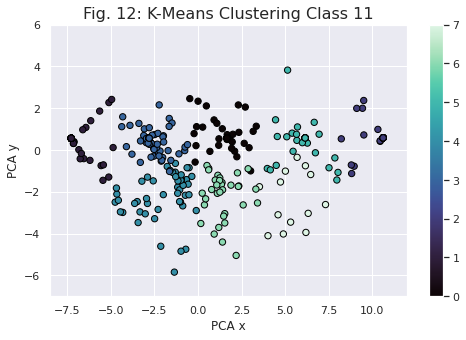

In [277]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(X11_PCA[:,0],X11_PCA[:,1],
                     c= labels_11,cmap = 'mako',s=40,edgecolors = 'black')
ax.set_title('Fig. 12: K-Means Clustering Class 11',fontsize=16)
ax.set_xlabel('PCA x')
ax.set_ylabel('PCA y')
ax.set_ylim(-7,6)
ax.set_xlim(-8.5,12)
plt.colorbar(scatter,spacing='uniform')
plt.show()

In [235]:
C11 = pd.concat([df.loc[df['class']==11].iloc[:,2:].reset_index(drop=True),pd.DataFrame(labels_11,columns=['cluster'])],axis=1)
C11.shape

(484, 32)

In [237]:
C11['cluster'].value_counts(normalize = True, sort = False)

0    0.239669
1    0.134298
2    0.082645
3    0.278926
4    0.103306
5    0.066116
6    0.068182
7    0.026860
Name: cluster, dtype: float64

Podemos observar que en la clase 11 hay 8 cluster, cinco de ellos contienen tan solo el 35% de los alumnos, esto nos indica que el grupo podría ser descrito con tan solo tres o cuatro clusters. Por lo cual, se realizará nuevamente el proceso de agrupación en tres grandes cluster.

In [0]:
model_C111 = KMeans(n_clusters=3,random_state=1).fit(X_11)
labels_111 = model_C111.labels_
pca_111 = PCA(n_components=2 , random_state = 1)
X111_PCA = pca_111.fit_transform(X_11)

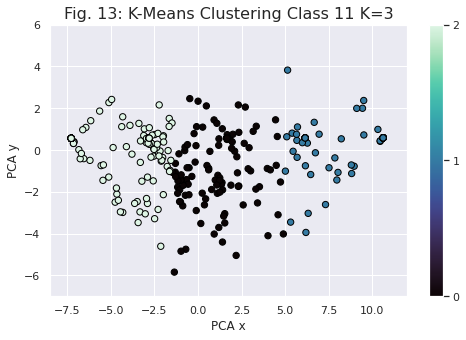

In [279]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(X111_PCA[:,0],X111_PCA[:,1],
                     c= labels_111,cmap = 'mako',s=40,edgecolors = 'black')
ax.set_title('Fig. 13: K-Means Clustering Class 11 K=3',fontsize=16)
ax.set_xlabel('PCA x')
ax.set_ylabel('PCA y')
ax.set_ylim(-7,6)
ax.set_xlim(-8.5,12)
plt.colorbar(scatter,spacing='proportional',ticks= [0,1,2])
plt.show()

In [246]:
C111 = pd.concat([df.loc[df['class']==11].iloc[:,2:].reset_index(drop=True),pd.DataFrame(labels_111,columns=['cluster'])],axis=1)
C111.shape

(484, 32)

In [247]:
C111['cluster'].value_counts(normalize = True, sort = False)

0    0.394628
1    0.154959
2    0.450413
Name: cluster, dtype: float64

Podemos observar que el que el 39% de los alumnos se encuentran en el cluster 0,15% de los alumnos en el cluster 2 y el 45% de los alumnos restantes al cluster 3.

In [0]:
XC11 = C111.loc[C111['cluster']==0].iloc [:, 3:31] 
C110_means = XC11.mean(axis = 0) 
C110_means = C110_means.to_frame('cluster=0')
C110_means.reset_index(level=0, inplace=True)


XC111 = C111.loc[C111['cluster']==1].iloc [:, 3:31] 
C111_means = XC111.mean(axis = 0) 
C111_means = C111_means.to_frame('cluster=1')

XC112 = C111.loc[C111['cluster']==2].iloc [:, 3:31] 
C112_means = XC112.mean(axis = 0) 
C112_means = C112_means.to_frame('cluster=2')

C11_means= pd.concat([C110_means,C111_means.reset_index(drop=True),C112_means.reset_index(drop=True)],axis=1)

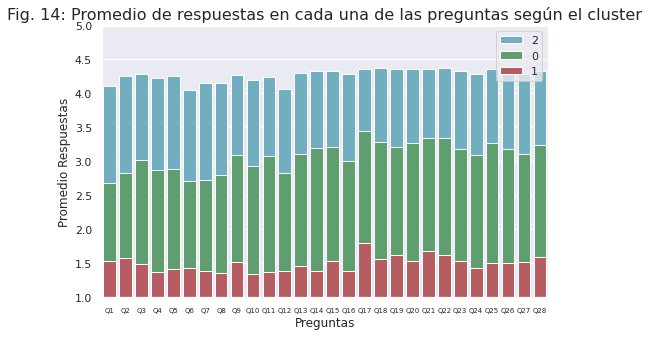

In [281]:
plt.figure(figsize=(8,5))
plt.title("Fig. 14: Promedio de respuestas en cada una de las preguntas según el cluster",fontsize=16)
sns.barplot(x='index', y = 'cluster=2', data = C11_means, color='c',label='2')

sns.barplot(x='index', y = 'cluster=0', data = C11_means, color='g',label='0')
sns.barplot(x='index', y = 'cluster=1', data = C11_means, color='r',label='1')
plt.tick_params(axis='x', labelsize=7)
plt.ylabel('Promedio Respuestas')
plt.xlabel('Preguntas')
plt.legend(loc= 'upper right')
plt.ylim(1,5)
plt.show()

Podemos observar que en este curso, el cluster 0 corresponde a los alumnos que el promedio de sus respuestas reflejó una posición "Neutral" o intermedia con respecto a la clase, el cluster 1 correponde a los alumnos que están inconformes con la clase y el cluster 2 corresponde a los que cuyas respuestas reflejaron conformidad con el curso.

In [266]:
C111.groupby(['cluster'])['attendance'].value_counts(normalize=True,sort=False)

cluster  attendance
0        0             0.209424
         1             0.235602
         2             0.178010
         3             0.251309
         4             0.125654
1        0             0.440000
         1             0.226667
         2             0.080000
         3             0.146667
         4             0.106667
2        0             0.206422
         1             0.178899
         2             0.119266
         3             0.284404
         4             0.211009
Name: attendance, dtype: float64

Podemos observar que el 44% de los alumnos pertenecientes al cluster 0 (Alumnos inconfomes), tienen el nivel de asiastencia mas bajo, y tan solo el 11% tiene el nivel más alto.

 Y en los cluster 0 y 2, el mayor porcentaje de alumnos tiene el nivel de asiastencia 3.

 **Esto quiere decir que la inconformidad de los alumnos puede estar relacionada con su ausencia a clases.**

In [267]:
C111.groupby(['cluster'])['difficulty'].value_counts(normalize=True,sort=False)

cluster  difficulty
0        1             0.141361
         2             0.068063
         3             0.413613
         4             0.303665
         5             0.073298
1        1             0.373333
         2             0.120000
         3             0.226667
         4             0.093333
         5             0.186667
2        1             0.151376
         2             0.059633
         3             0.408257
         4             0.307339
         5             0.073394
Name: difficulty, dtype: float64

En el cluster 0 podemos observar que el 41% de los alumnos puntuó la clase con dificultad media, 30% con dificultad 4. Mientras que en el cluster 1, el 37% la puntuó con la dificultad mas baja, 23% con dificultad media y 19% con la mayor dificultad. Por otra parte, 40% de los estudiantes pertenecientes al cluster la calificaron como dificultad media y 31% con dificultad 4.

**Estos nos dice que la dificultad de la clase era percibida de igual forma por los alumnos pertenecientes al cluster 2 y el 0. Sin embargo, gran parte de los estudiantes pertenecientes al cluster 1 calificó la materia como muy facil, esto puede explicar por que este grupo demostró inconformidad en las preguntas de la encuesta.**

In [271]:
C111.groupby(['cluster'])['nb.repeat'].value_counts(normalize=True,sort=False)

cluster  nb.repeat
0        1            0.853403
         2            0.109948
         3            0.036649
1        1            0.840000
         2            0.146667
         3            0.013333
2        1            0.940367
         2            0.050459
         3            0.009174
Name: nb.repeat, dtype: float64

**Podemos observar que el cluster con menos cantidad de repitientes es el cluster 2 donde, solo el 6% no está viendo la materia por primera vez**. 

En el cluster 1 el 16% está repitiendo la materia y en el cluster 0, 15% de los alumnos son repitientes.
